In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df_raw = pd.read_csv('Data/export.csv')
df = df_raw.copy()

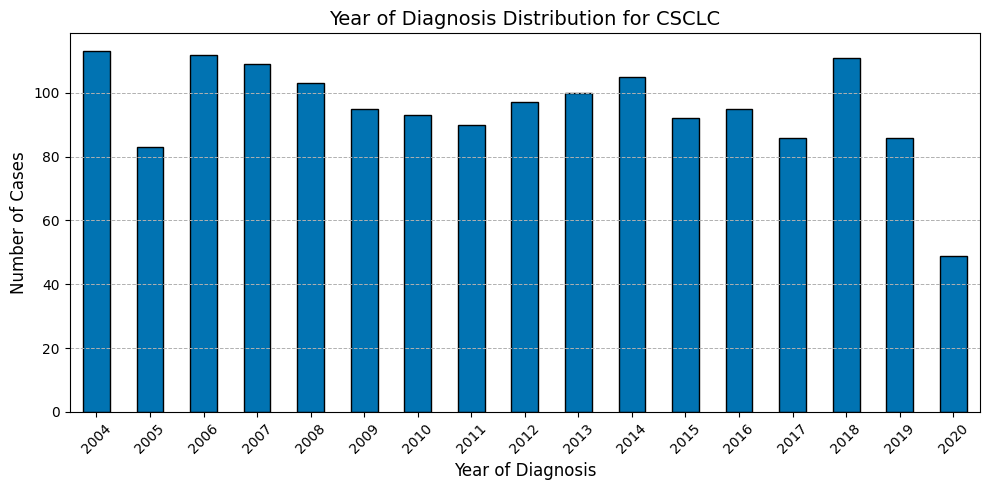

In [56]:
# Apply seaborn style to make plots look more professional
plt.style.use('seaborn-v0_8-colorblind')
palette = sns.color_palette("colorblind")  # This generates a colorblind-friendly palette
bar_color = palette[0]  # Using the first color in the palette
# Your data plotting code with enhancements
df['Year of diagnosis'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(10, 5), color=bar_color, edgecolor='black')

# Add labels and title for clarity
plt.xlabel('Year of Diagnosis', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Year of Diagnosis Distribution for CSCLC', fontsize=14)

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Add gridlines for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Patient ID                                    1619 non-null   int64 
 1   Age recode with <1 year olds                  1619 non-null   object
 2   Marital status at diagnosis                   1619 non-null   object
 3   Year of diagnosis                             1619 non-null   int64 
 4   Sex                                           1619 non-null   object
 5   Race recode (W, B, AI, API)                   1619 non-null   object
 6   Derived AJCC T, 6th ed (2004-2015)            1604 non-null   object
 7   Derived AJCC N, 6th ed (2004-2015)            1604 non-null   object
 8   Derived AJCC M, 6th ed (2004-2015)            1604 non-null   object
 9   Derived AJCC Stage Group, 6th ed (2004-2015)  1604 non-null   object
 10  

In [58]:
# drop the NaN values in Survival months
df = df.dropna(subset=['Survival months'])

# drop the 'Unknown' values in Survival months
df = df[df['Survival months'] != 'Unknown']

df['Survival months'] = df['Survival months'].astype('int64')

In [59]:
# drop the 'Derived EOD 2018 T (2018+)'==88
df = df[df['Derived EOD 2018 T (2018+)'] != '88']

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

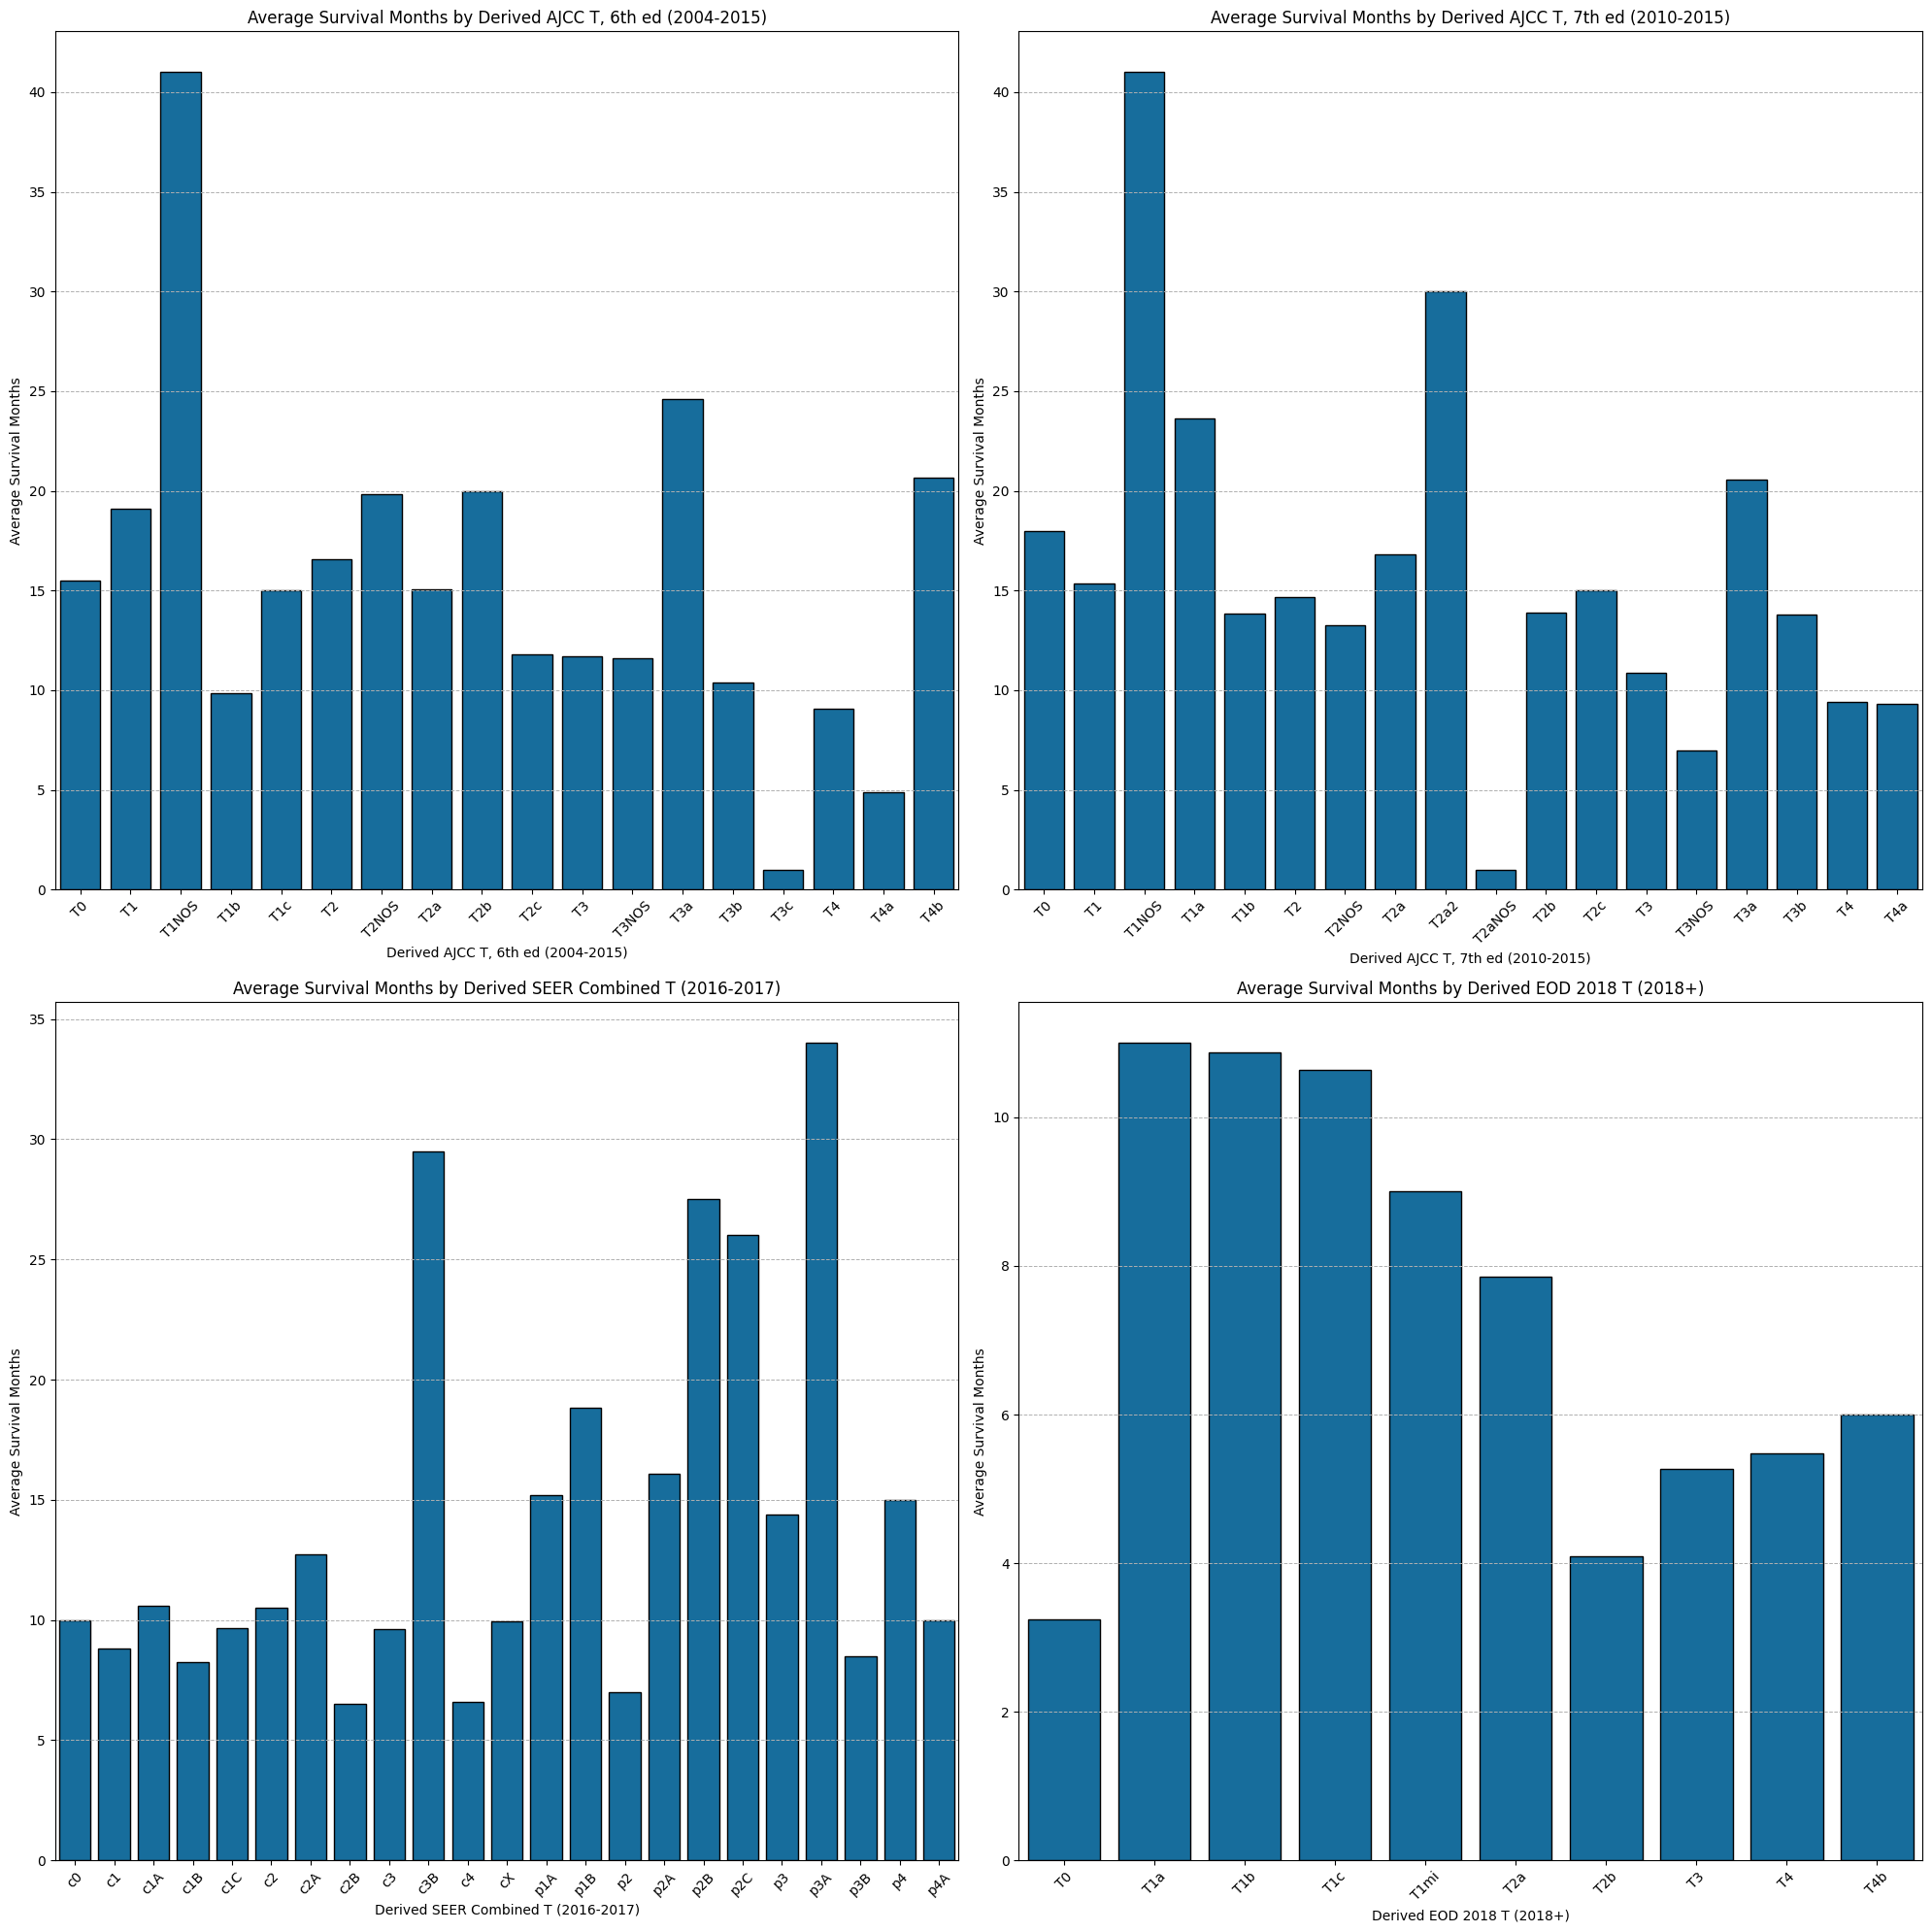

In [60]:
# Function to plot the average survival months for each group within the category
def plot_avg_survival_by_group(data, category, ax):
    # Drop records where the category is '88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX'
    filtered_data = data[~data[category].isin(['88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX','OCCULT', 'UNK Stage','99','0is'])]
    # Convert the category to an ordered categorical type to sort the x-axis
    filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
    # Sort the data
    filtered_data = filtered_data.sort_values(by=category)
    # Calculate average survival months for each group within the category
    group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
    
    # Sort the groups for consistent plotting
    group_avgs = group_avgs.sort_values(by='Survival months')
    
    # Plot a bar plot with the average survival months for each group within the category
    sns.barplot(x=category, y='Survival months', data=group_avgs, ax=ax, color=bar_color, edgecolor='black')
    ax.set_title(f'Average Survival Months by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Average Survival Months')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # add gridlines for better readability
    ax.grid(axis='y', linestyle='--', linewidth=0.7)

# Create a subplot for each category
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()  # Flatten the axis array for easy iteration

# List of categories
categories = [
    'Derived AJCC T, 6th ed (2004-2015)', 
    'Derived AJCC T, 7th ed (2010-2015)', 
    'Derived SEER Combined T (2016-2017)',
    'Derived EOD 2018 T (2018+)'
]

# Plot bar plot for each category
for ax, cat in zip(axs, categories):
    plot_avg_survival_by_group(df, cat, ax)

plt.tight_layout()
plt.show()

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

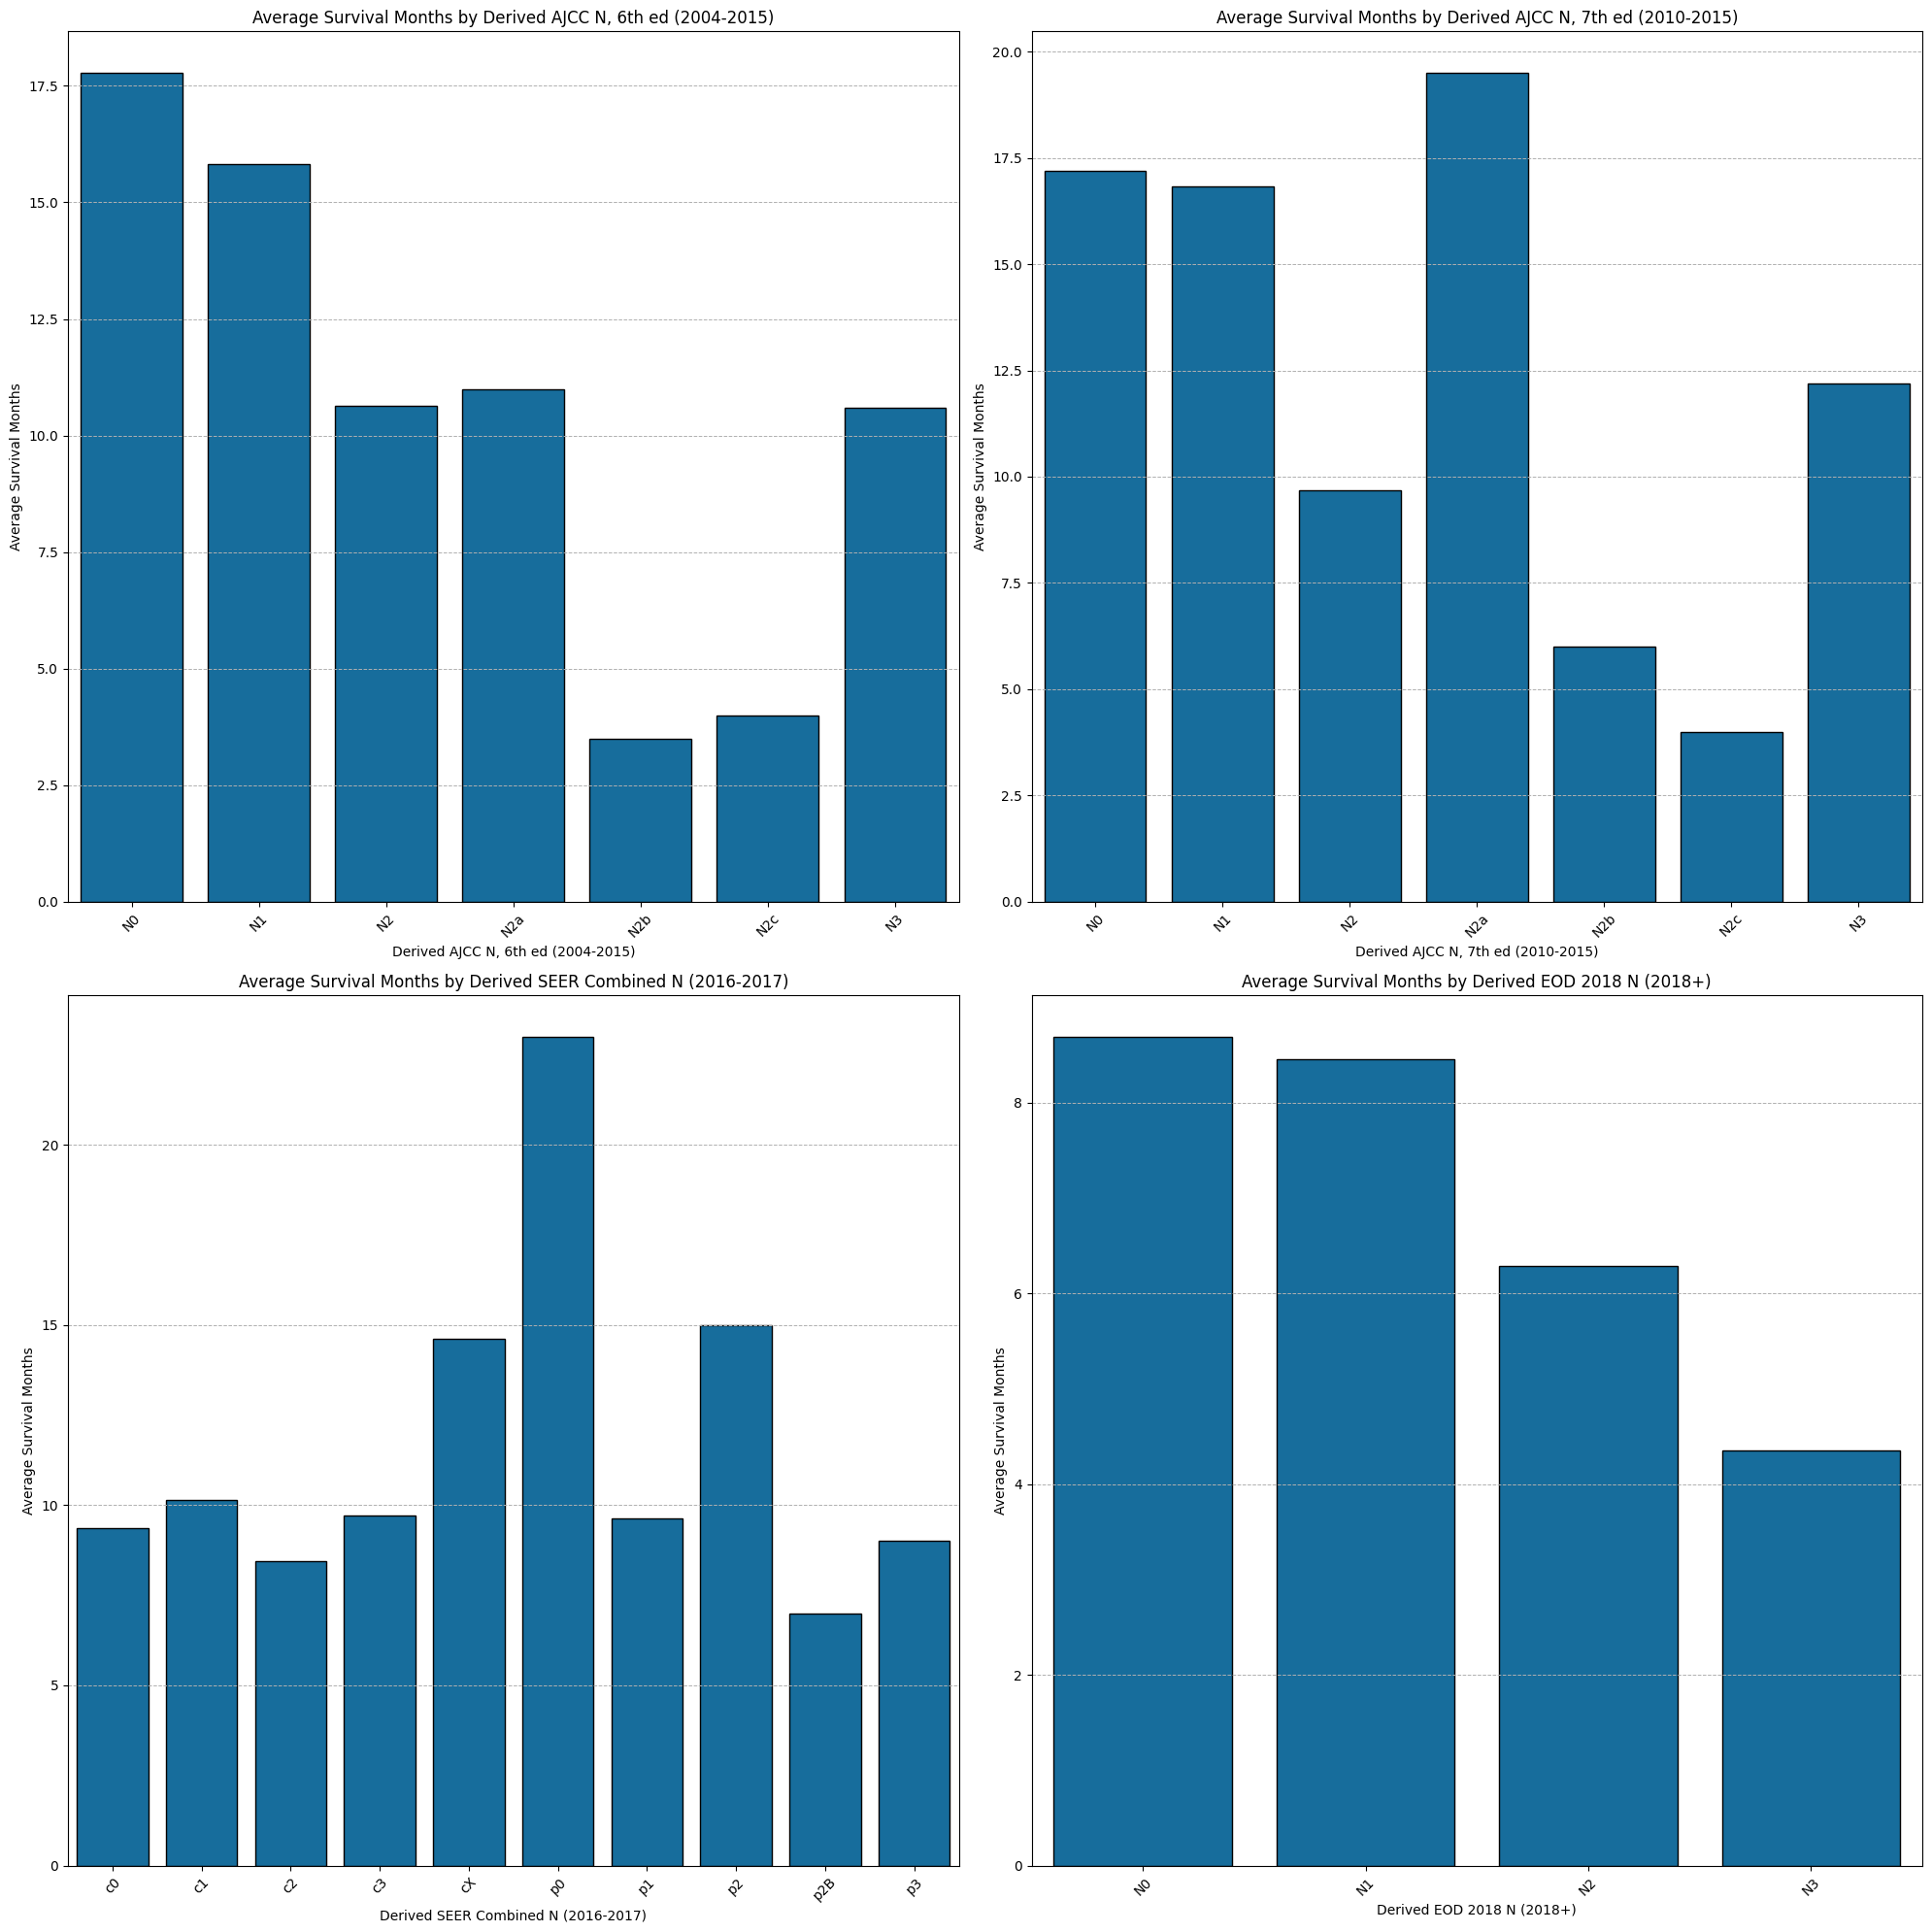

In [61]:
# Create a subplot for each category
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()  # Flatten the axis array for easy iteration

# List of categories
categories = [
    'Derived AJCC N, 6th ed (2004-2015)', 
    'Derived AJCC N, 7th ed (2010-2015)', 
    'Derived SEER Combined N (2016-2017)',
    'Derived EOD 2018 N (2018+)'
]

# Plot bar plot for each category
for ax, cat in zip(axs, categories):
    plot_avg_survival_by_group(df, cat, ax)

plt.tight_layout()
plt.show()

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

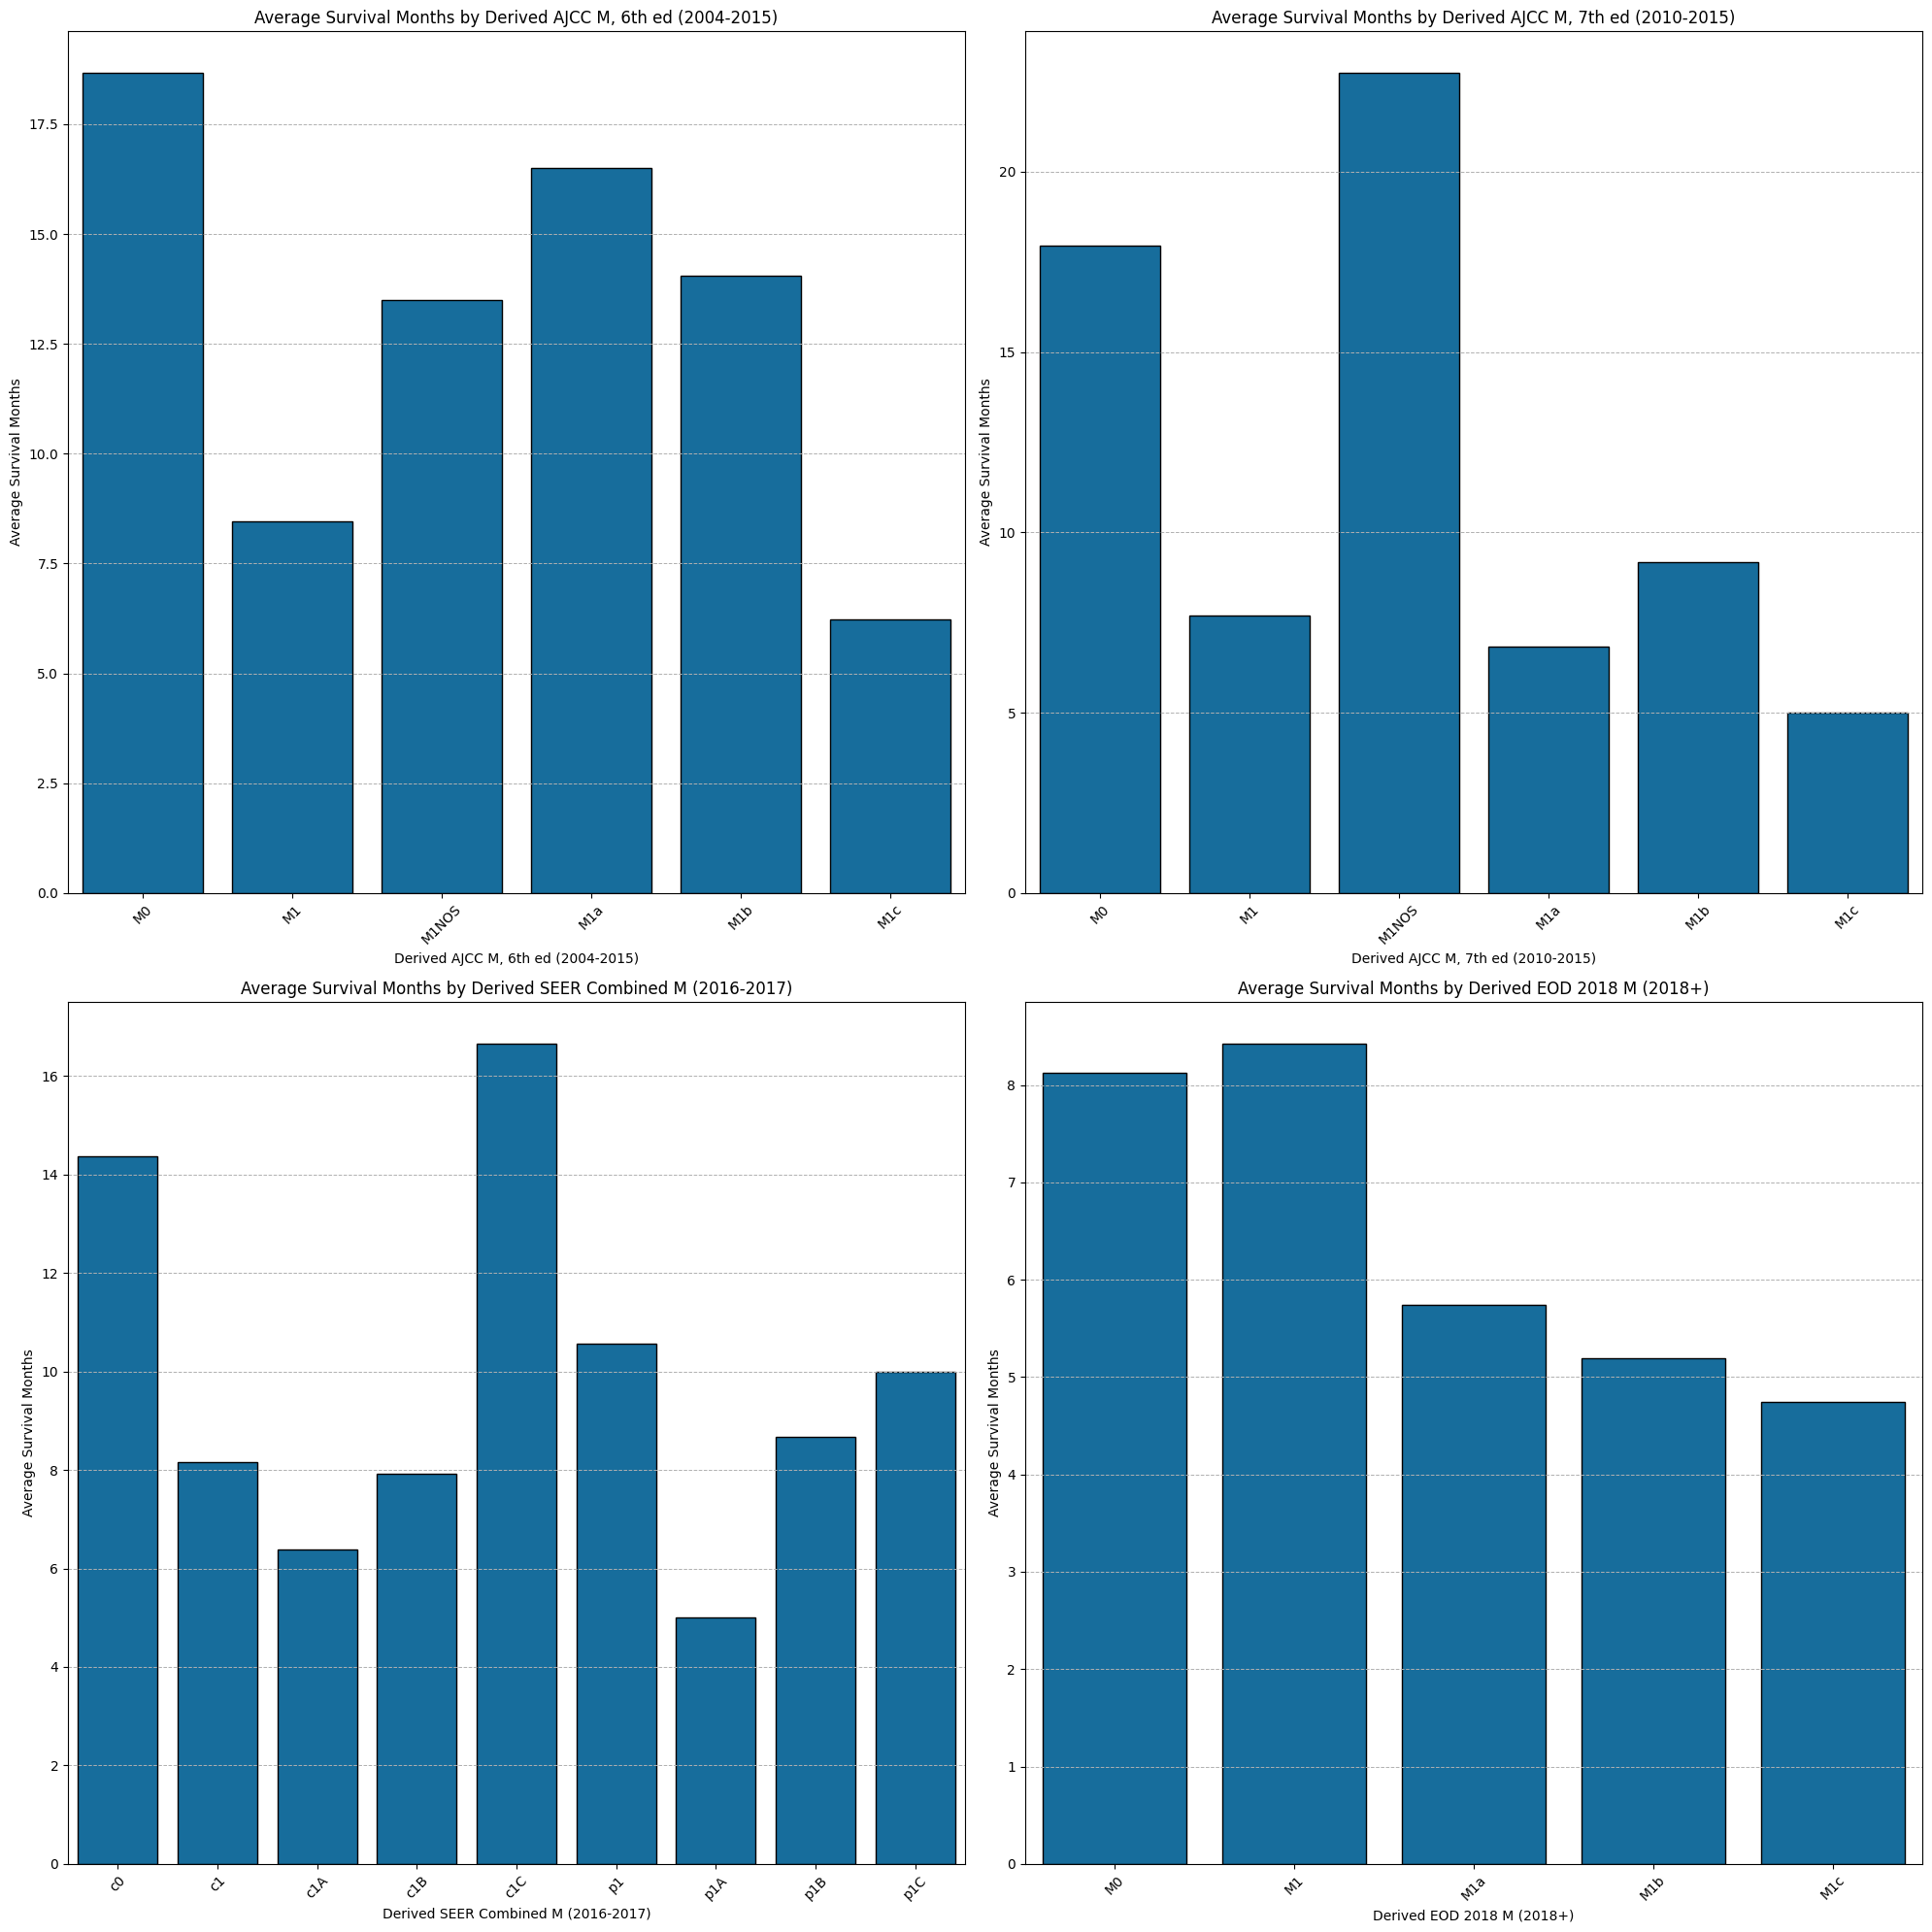

In [62]:
# Create a subplot for each category
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()  # Flatten the axis array for easy iteration

# List of categories
categories = [
    'Derived AJCC M, 6th ed (2004-2015)', 
    'Derived AJCC M, 7th ed (2010-2015)', 
    'Derived SEER Combined M (2016-2017)',
    'Derived EOD 2018 M (2018+)'
]

# Plot bar plot for each category
for ax, cat in zip(axs, categories):
    plot_avg_survival_by_group(df, cat, ax)

plt.tight_layout()
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1618
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Patient ID                                    1541 non-null   int64 
 1   Age recode with <1 year olds                  1541 non-null   object
 2   Marital status at diagnosis                   1541 non-null   object
 3   Year of diagnosis                             1541 non-null   int64 
 4   Sex                                           1541 non-null   object
 5   Race recode (W, B, AI, API)                   1541 non-null   object
 6   Derived AJCC T, 6th ed (2004-2015)            1526 non-null   object
 7   Derived AJCC N, 6th ed (2004-2015)            1526 non-null   object
 8   Derived AJCC M, 6th ed (2004-2015)            1526 non-null   object
 9   Derived AJCC Stage Group, 6th ed (2004-2015)  1526 non-null   object
 10  Deriv

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\1931337296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

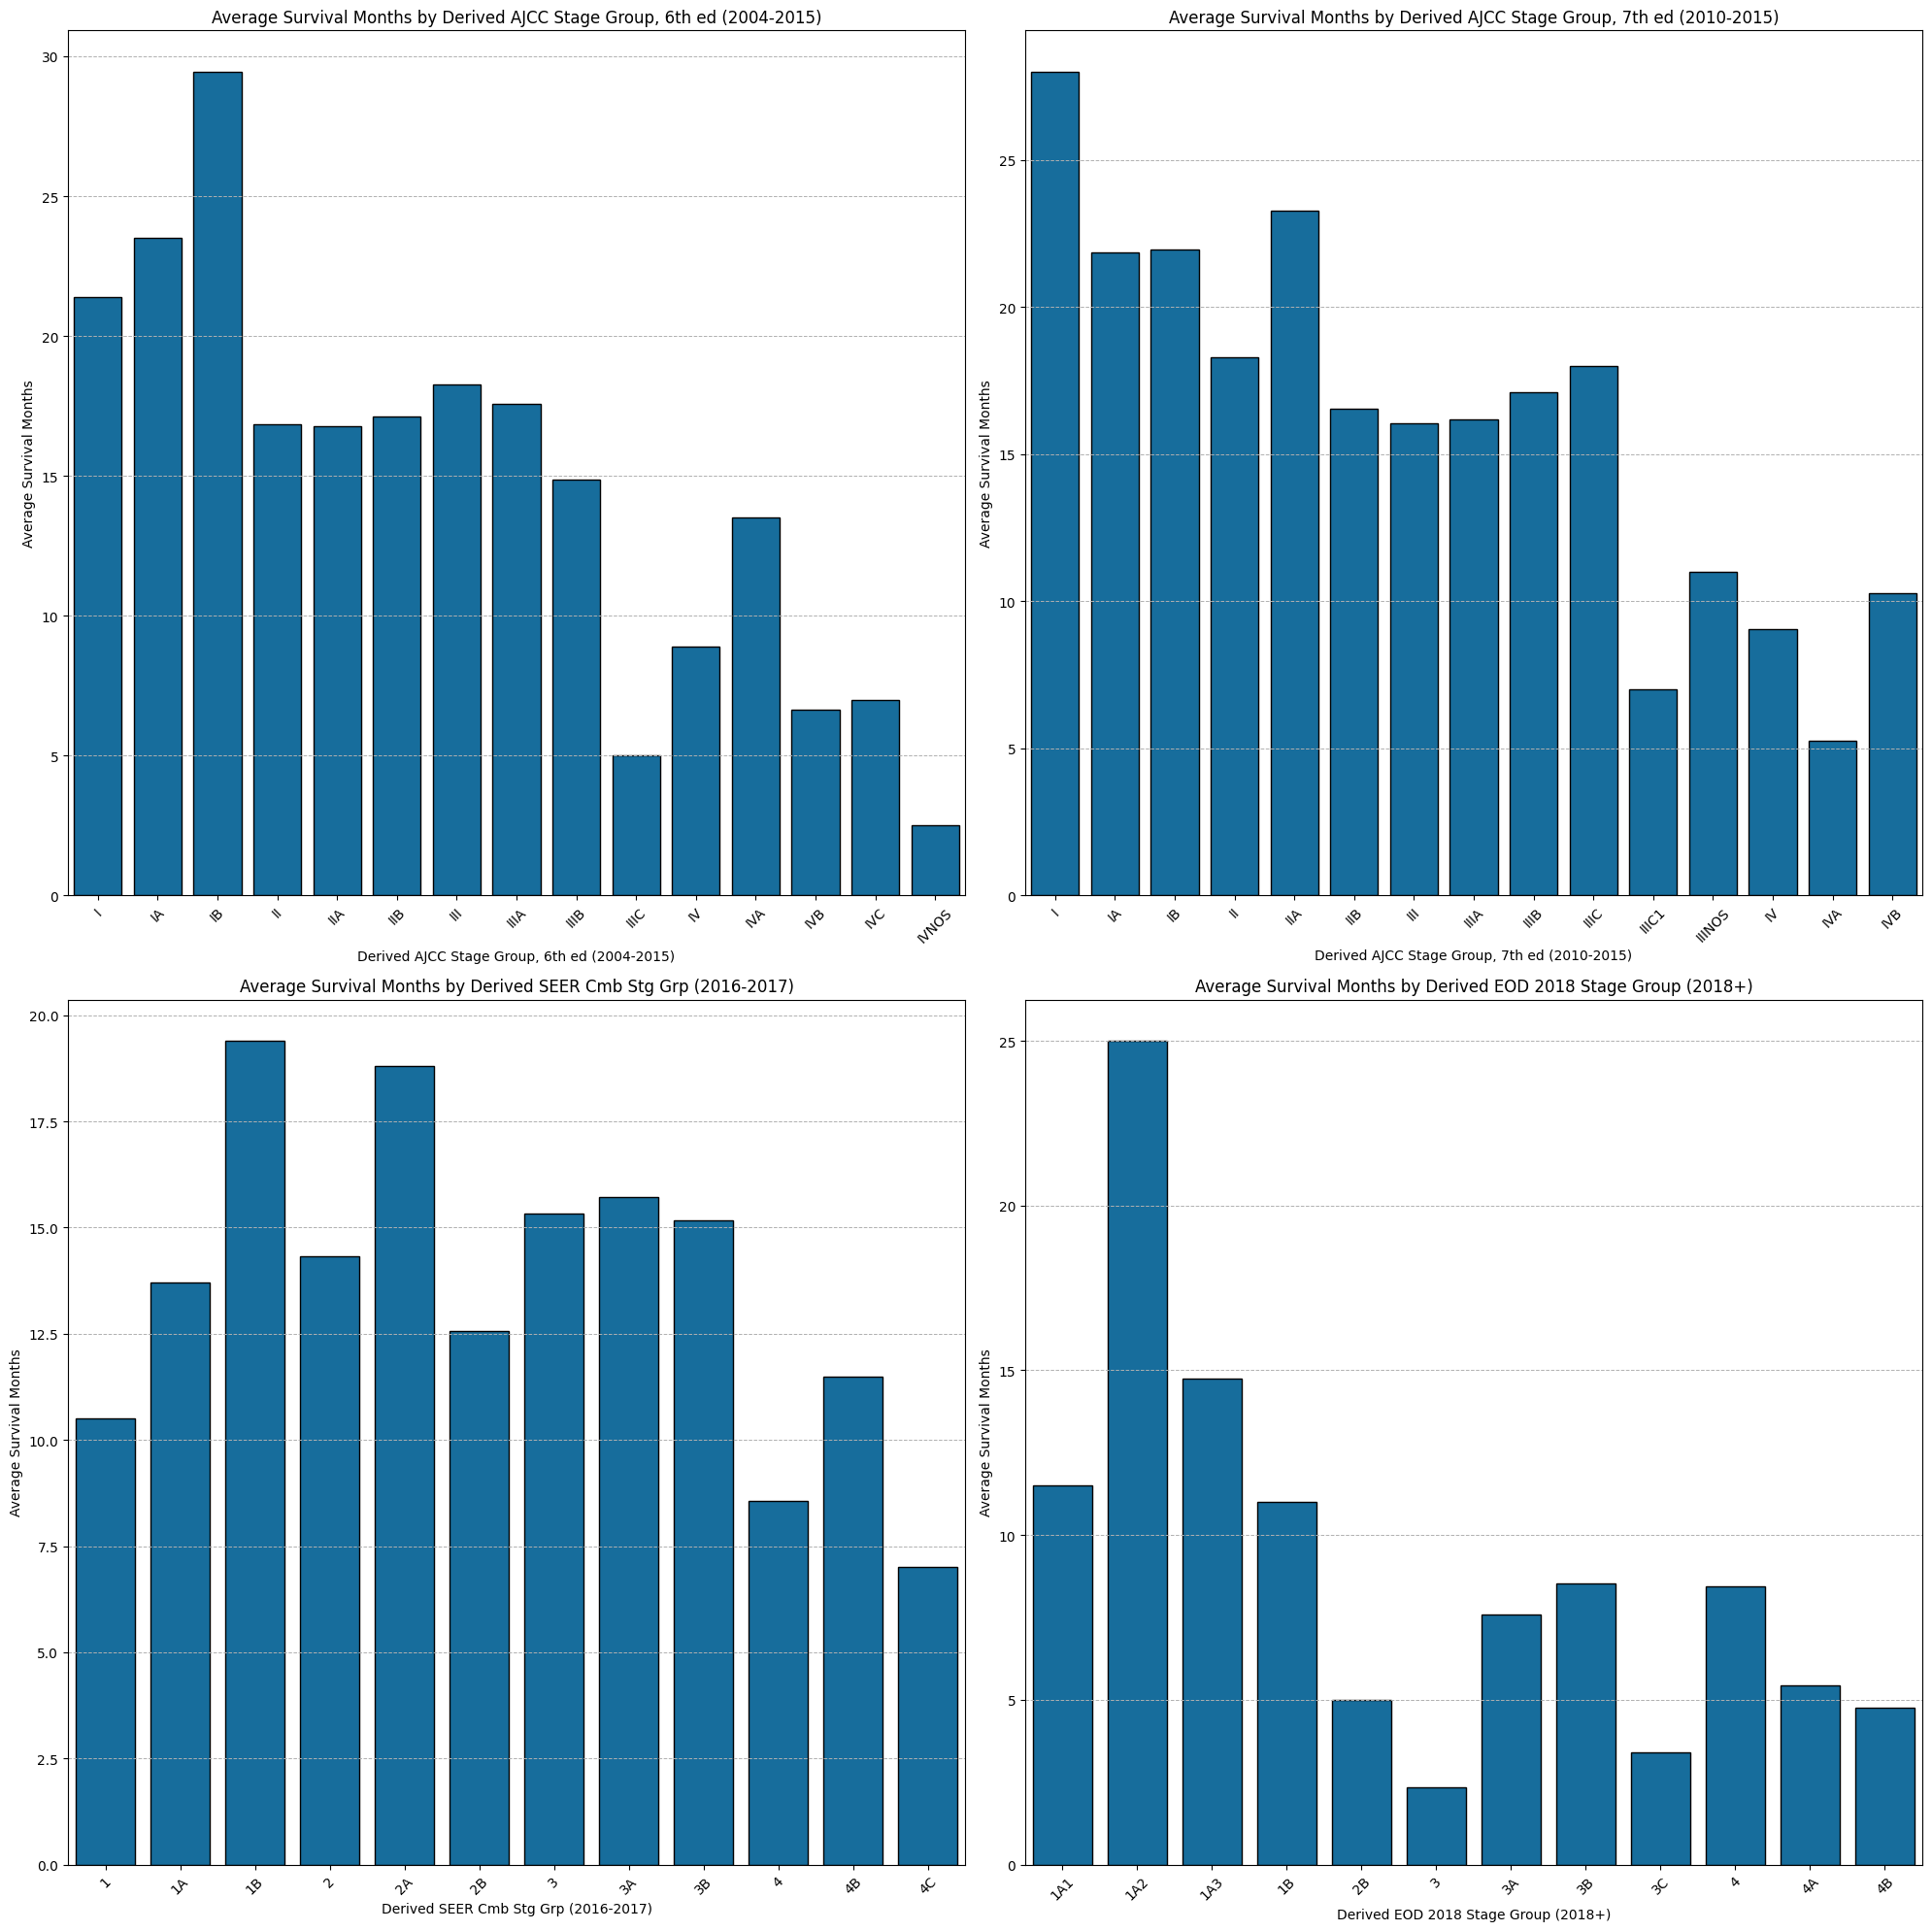

In [64]:
# Create a subplot for each category
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()  # Flatten the axis array for easy iteration

# List of categories
categories = [
    'Derived AJCC Stage Group, 6th ed (2004-2015)', 
    'Derived AJCC Stage Group, 7th ed (2010-2015)', 
    'Derived SEER Cmb Stg Grp (2016-2017)',
    'Derived EOD 2018 Stage Group (2018+)'
]

# Plot bar plot for each category
for ax, cat in zip(axs, categories):
    plot_avg_survival_by_group(df, cat, ax)

plt.tight_layout()
plt.show()

In [65]:
def plot_avg_survival_by_group(data, category, ax):
    # Drop records where the category is '88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX'
    filtered_data = data[~data[category].isin(['88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX','OCCULT', 'UNK Stage','99','0is'])]
    # Convert the category to an ordered categorical type to sort the x-axis
    filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
    # Sort the data
    filtered_data = filtered_data.sort_values(by=category)
    # Calculate average survival months for each group within the category
    group_avgs = filtered_data.groupby(category)['Survival months'].mean().reset_index()
    
    # Sort the groups for consistent plotting
    group_avgs = group_avgs.sort_values(by='Survival months')
    
    # Plot a bar plot with the average survival months for each group within the category
    sns.barplot(x=category, y='Survival months', data=group_avgs, ax=ax, color=bar_color, edgecolor='black')
    ax.set_title(f'Average Survival Months by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Average Survival Months')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # add gridlines for better readability
    ax.grid(axis='y', linestyle='--', linewidth=0.7)

In [66]:
df1 = pd.read_csv('session_meta.csv')

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\3669237676.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('session_meta.csv')


In [67]:
df1.shape

(477339, 29)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477339 entries, 0 to 477338
Data columns (total 29 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Patient ID                                    477339 non-null  int64 
 1   Age recode with <1 year olds                  477339 non-null  object
 2   Marital status at diagnosis                   477339 non-null  object
 3   Year of diagnosis                             477339 non-null  int64 
 4   Sex                                           477339 non-null  object
 5   Race recode (W, B, AI, API)                   477339 non-null  object
 6   Derived AJCC T, 6th ed (2004-2015)            477339 non-null  object
 7   Derived AJCC N, 6th ed (2004-2015)            477339 non-null  object
 8   Derived AJCC M, 6th ed (2004-2015)            477339 non-null  object
 9   Derived AJCC Stage Group, 6th ed (2004-2015)  477339 non-nu

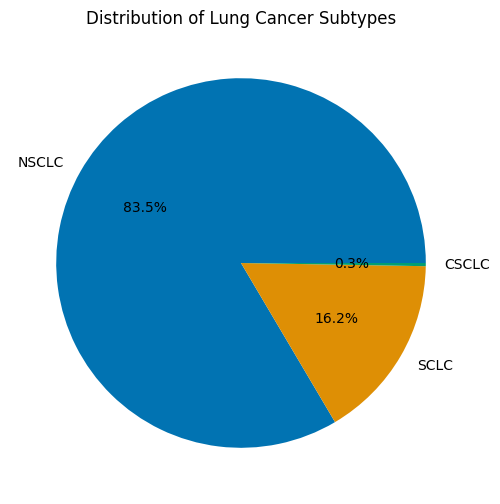

In [69]:
# Define the ICD-O-3 codes for each cancer type
non_small_cell_lung_cancer_codes = [
    8010, 8012, 8013, 8020, 8046, 8050, 8051, 8052, 8070, 8071, 8072, 8073, 8074, 8075, 8076, 8077, 8078, 
    8140, 8141, 8143, 8147, 8250, 8251, 8252, 8253, 8254, 8255, 8260, 8310, 8430, 8480, 8481, 8490, 8560, 
    8570, 8571, 8572, 8573, 8574, 8575
]
small_cell_lung_cancer_codes = [8002, 8041, 8042, 8043, 8044]
combined_small_cell_lung_cancer_codes = [8045]

# Function to classify each row
def classify_cancer(row):
    if row in non_small_cell_lung_cancer_codes:
        return 'NSCLC'
    elif row in small_cell_lung_cancer_codes:
        return 'SCLC'
    elif row in combined_small_cell_lung_cancer_codes:
        return 'CSCLC'

# Apply the classification
df1['Cancer Type'] = df1['Histologic Type ICD-O-3'].apply(classify_cancer)

# Group by 'Cancer Type' and count the occurrences
cancer_type_counts = df1['Cancer Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.pie(cancer_type_counts, labels=cancer_type_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Lung Cancer Subtypes')  # You can customize the title as needed
plt.show()

In [70]:
# drop the NaN values in Survival months
df1 = df1.dropna(subset=['Survival months'])

# drop the 'Unknown' values in Survival months
df1 = df1[df1['Survival months'] != 'Unknown']

df1['Survival months'] = df1['Survival months'].astype('int64')

<Axes: xlabel='Survival months'>

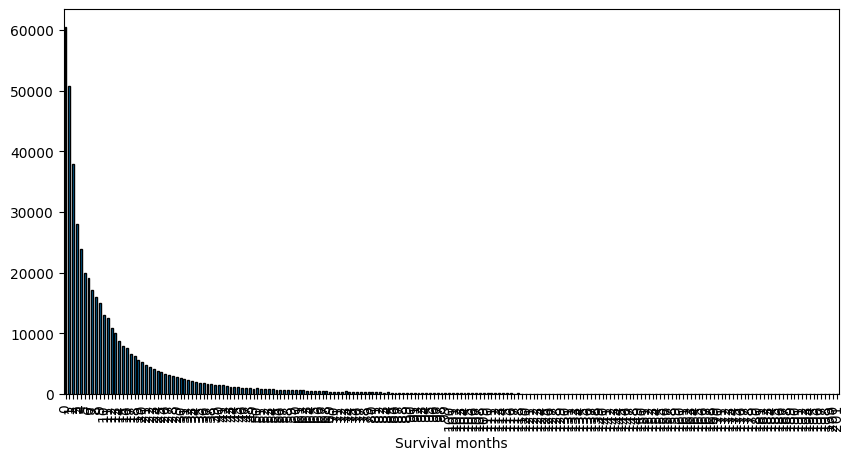

In [71]:
df1['Survival months'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(10, 5), color=bar_color, edgecolor='black')

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\4075008605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancer Type', y='Survival months', data=df1, palette=palette)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\4075008605.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='Cancer Type', y='Survival months', data=df1, palette=palette)


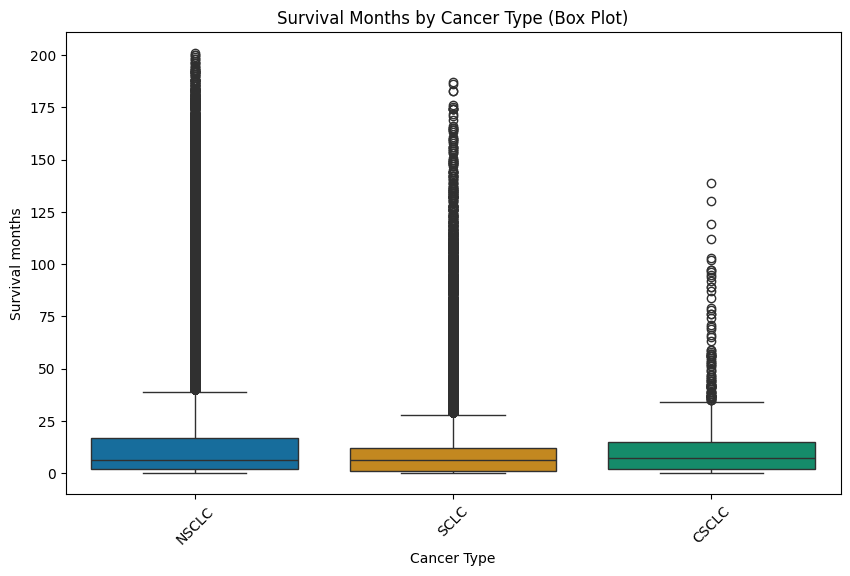

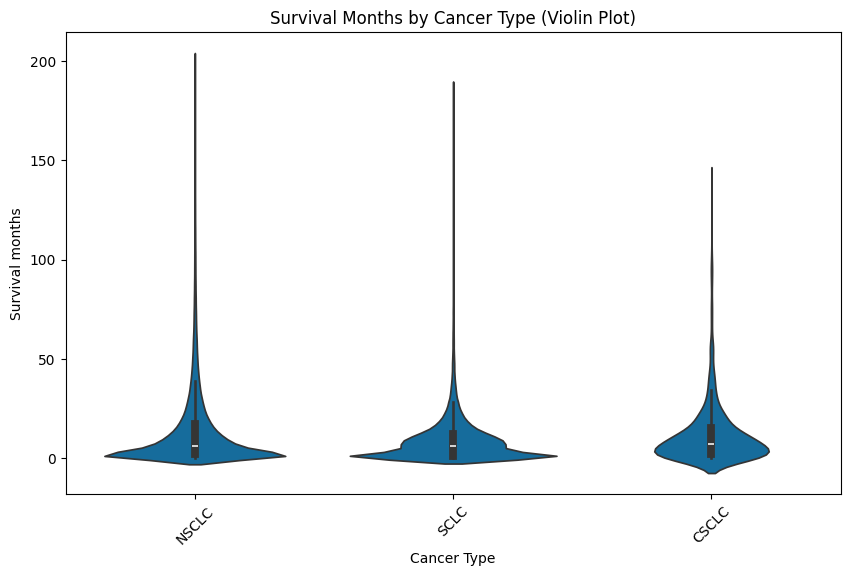

In [72]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer Type', y='Survival months', data=df1, palette=palette)
plt.title('Survival Months by Cancer Type (Box Plot)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cancer Type', y='Survival months', data=df1)
plt.title('Survival Months by Cancer Type (Violin Plot)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

In [73]:
summary_stats = df1.groupby('Cancer Type')['Survival months'].agg(['mean', 'median']).reset_index()

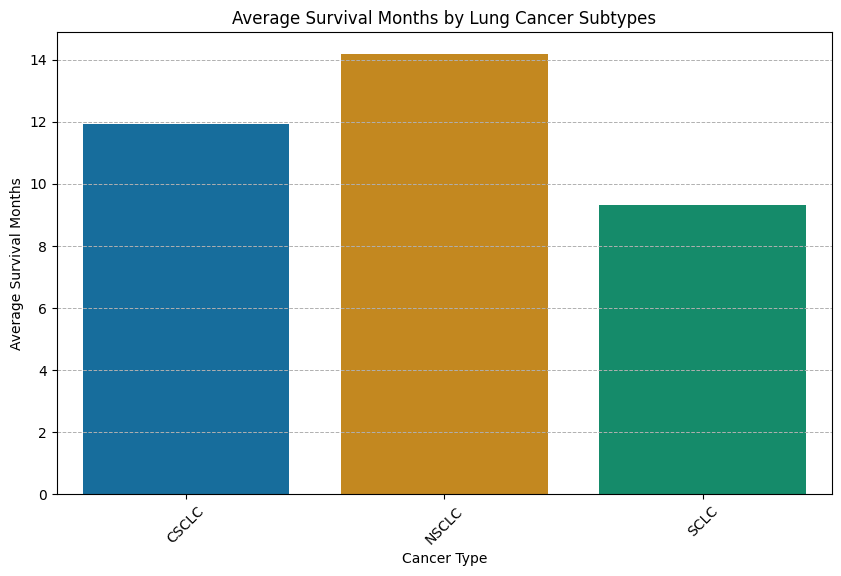

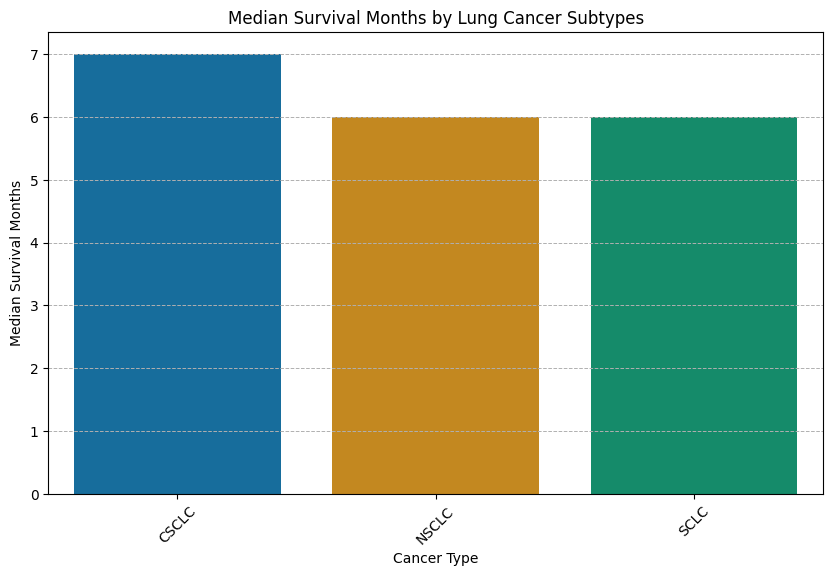

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the mean survival months
plt.figure(figsize=(10, 6))
sns.barplot(x='Cancer Type', y='mean', data=summary_stats, hue='Cancer Type', palette='colorblind')
plt.title('Average Survival Months by Lung Cancer Subtypes')
plt.xticks(rotation=45)
plt.ylabel('Average Survival Months')
# add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Plotting the median survival months
plt.figure(figsize=(10, 6))
sns.barplot(x='Cancer Type', y='median', data=summary_stats, hue='Cancer Type', palette='colorblind')
plt.title('Median Survival Months by Lung Cancer Subtypes')
plt.xticks(rotation=45)
# add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.ylabel('Median Survival Months')
plt.show()


In [78]:
def plot_survival_by_group(data, category, ax):
    # Drop records where the category is '88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX'
    filtered_data = data[~data[category].isin(['88', 'Blank(s)', 'Not applicable', 'TX', 'Tis','NX','MX','OCCULT', 'UNK Stage','99','0is'])]
    # Convert the category to an ordered categorical type to sort the x-axis
    filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
    # Sort the data
    filtered_data = filtered_data.sort_values(by=category)
    # plot boxplot for the survival months for each group within the category
    sns.boxplot(x=category, y='Survival months', data=filtered_data, ax=ax, palette=palette)
    ax.set_title(f'Survival Months Distribution by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('The Counts of Survival Months')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # add gridlines for better readability
    ax.grid(axis='y', linestyle='--', linewidth=0.7)

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\40509486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[category] = pd.Categorical(filtered_data[category], ordered=True)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\40509486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y='Survival months', data=filtered_data, ax=ax, palette=palette)
C:\Users\yuyum\AppData\Local\Temp\ipykernel_36248\40509486.py:9: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=category, y='Sur

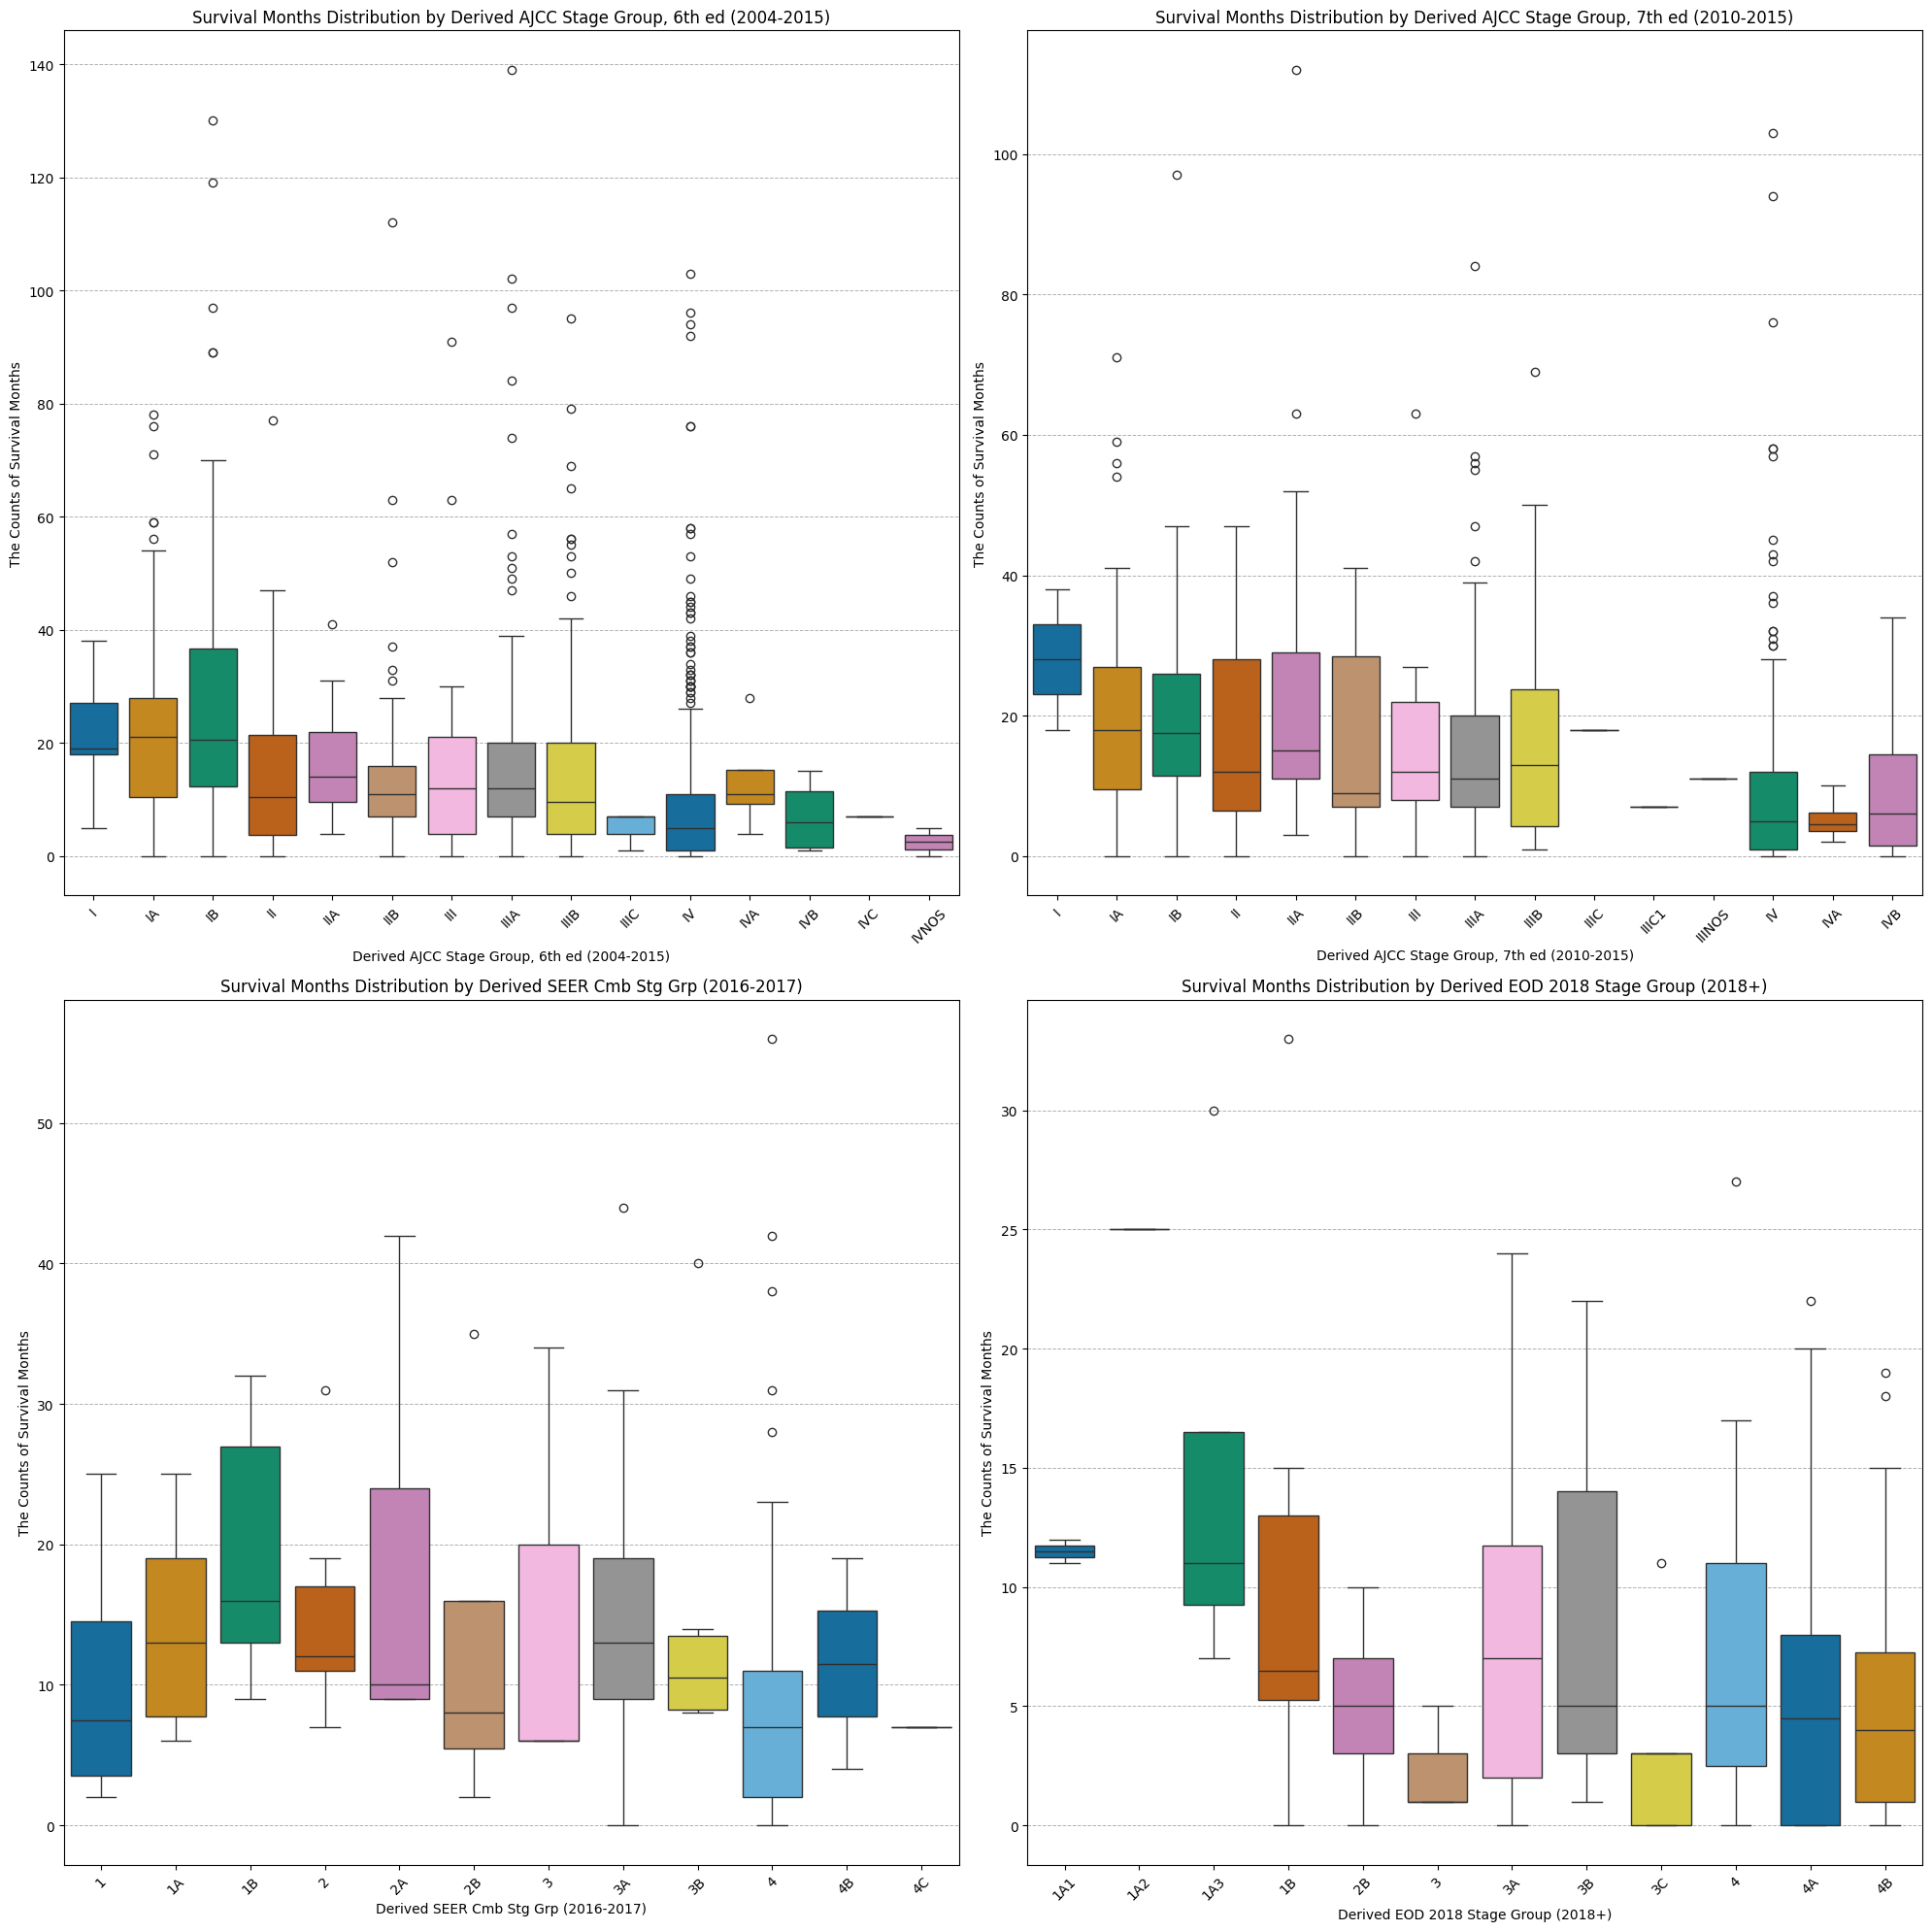

In [79]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), constrained_layout=True)
axs = axs.flatten()  # Flatten the axis array for easy iteration

# List of categories
categories = [
    'Derived AJCC Stage Group, 6th ed (2004-2015)', 
    'Derived AJCC Stage Group, 7th ed (2010-2015)', 
    'Derived SEER Cmb Stg Grp (2016-2017)',
    'Derived EOD 2018 Stage Group (2018+)'
]

# Plot bar plot for each category
for ax, cat in zip(axs, categories):
    plot_survival_by_group(df, cat, ax)

plt.tight_layout()
plt.show()